## Data loading - RLFW
Source: http://whdeng.cn/RFW/testing.html


Make suitable for ArcFace and MagFace (112x112) and FaceNet (160x160)

### Data folder structure and metadata


In [1]:
# Load packages

# Common
import pandas as pd
import numpy as np
import os
import cv2 as cv
from IPython.display import clear_output as cls
import json

# Data 
from glob import glob

# Data Visuaalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Model



### Descriptive analysis of data

#### Data concatenation

In [6]:
## Create dataframe 

# Define the path to the raw data directory
raw_data_path = '../data/raw/'

# Initialize lists to store image characteristics
img_names = []
ethnicities = []
face_ids = []

# Iterate through the directories of each ethnicity (e.g., 'Asian')
ethnicities_list = os.listdir(raw_data_path + 'RLFW_mini/data')
for ethnicity in ethnicities_list:
    ethnicity_dir = os.path.join(raw_data_path + 'RLFW_mini/data', ethnicity)
    if os.path.isdir(ethnicity_dir): # indside dir
        id_list = os.listdir(ethnicity_dir) # get ids
        for id_name in id_list: 
            ids_dir = os.path.join(ethnicity_dir, id_name)
            if os.path.isdir(ids_dir):
                for img_name in os.listdir(ids_dir):
                    if img_name.endswith('.jpg'):       
                        # Extract information from image filename
                        image_name = os.path.splitext(img_name)[0]
                        image_info = image_name.split('_')
                        image_id = image_info[-1]

                        # Append image characteristics to lists
                        img_names.append(id_name)
                        ethnicities.append(ethnicity)
                        face_ids.append(image_id)

# Create a DataFrame from the lists
data = {'img_name': img_names, 'ethnicity': ethnicities, 'face_id': face_ids}
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,img_name,ethnicity,face_id
0,m.0b_5sd,Indian,0002
1,m.0b_5sd,Indian,0003
2,m.0b_5sd,Indian,0001
3,m.0b_1sx,Indian,0001
4,m.0b_1sx,Indian,0003


In [ ]:
# Read the JSON file into a JSON variable
with open('../data/raw/age_estimation/output_data_precroped_all_age.json', 'r') as file:
    json_data = json.load(file)
    
# Convert the JSON data to a DataFrame
age_df = pd.DataFrame.from_dict(json_data, orient='index', columns=['Age'])
# Convert the 'Age' column to numeric
age_df['Age'] = pd.to_numeric(age_df['Age'])
age_df.reset_index(inplace=True)
age_df.columns = ['img_name', 'Age']

age_df.head()

In [ ]:
# Concatenate dataframes
final_df = pd.merge(age_df, df, on='img_name', how='inner')
final_df.head()

#### Data distributions
(Evt efter age groups)

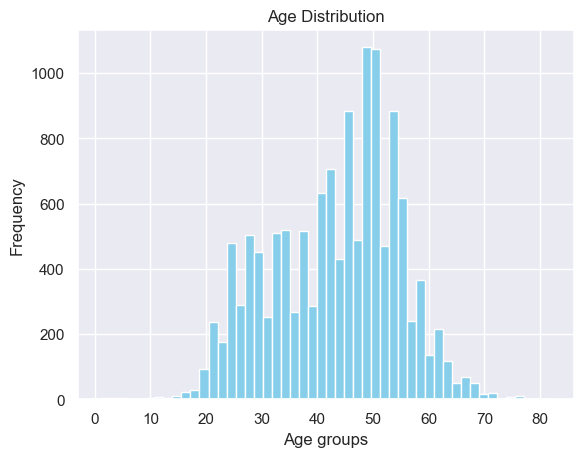

In [5]:
# Define bin edges for each group of 3 years
plt.hist(age_df['Age'], bins=50, color='skyblue')
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

